In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
Consumer_Key = "hVR5LqvEj6gVz0aFjb2ZncujD"
Consumer_Secret_Key = "M6QUpMwZwPeUPZEOlQ0Rk2xX7i3Lux0DYcu67rQhkH4U56LUlB" 
Access_Token = "1205070840666062848-b2zhxJ23q7dLAtMCn06eq4emogwUEN"
Access_Token_Secret = "YY48zF7TsKAwu57vhHEL21gp3jBbZkxtzKssWm6ttILmH"

In [4]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [5]:
posts = api.user_timeline(screen_name="ShopeeID", count = 2000, lang = "eng", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) @potatobitc untuk pengecekan kendala kamu lebih lanjut, silakan infoin screenshot kendalanya ke dm @ShopeeID . stay safe 🙏^QK (2/2)

2) @potatobitc hai kak, mohon maaf terkait kendala tidak bisa membuka Seller Centre via PC. mimin sarankan jaringan internet kakak dalam keadaan yang stabil ya kak.  (1/2)

3) Satu orang pemenang akan dipilih secara acak &amp; diumumkan 10 Januari 2023. Shopee akan mendiskualifikasi jika terjadi/menemukan kecurangan dalam giveaway.

4) @mililky_06 utk pengecekan lbh lanjut bisa dm ke mimin bukti pembayaran dan usernamenya ya. terima kasih (2) ^HI

5) @mililky_06 Halo kak, maaf ya bikin cemas. mengenai kendala top up ShopeePay kamu yg blm masuk mohon menunggu 1x24 jam sjk kamu melakukan pembayaran ya. (1)

6) @mommyzeera Baik kak, mohon maaf atas ketidaknyamannya. utk pengecekan lebih lanjut mohon kesediannya utk infoin ke dm ya detail kendalanya kak. terima kasih 🙏 ^HI

7) @AdisAmari Mohon coba secara berkala selama 1x24 ja

In [6]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@potatobitc untuk pengecekan kendala kamu lebi...
1,"@potatobitc hai kak, mohon maaf terkait kendal..."
2,Satu orang pemenang akan dipilih secara acak &...
3,@mililky_06 utk pengecekan lbh lanjut bisa dm ...
4,"@mililky_06 Halo kak, maaf ya bikin cemas. men..."


In [7]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"untuk pengecekan kendala kamu lebih lanjut, s..."
1,"hai kak, mohon maaf terkait kendala tidak bis..."
2,Satu orang pemenang akan dipilih secara acak &...
3,_06 utk pengecekan lbh lanjut bisa dm ke mimin...
4,"_06 Halo kak, maaf ya bikin cemas. mengenai ke..."
...,...
195,\nkalo ada yg ditanyakan kembali boleh infoka...
196,"Hai kak, maaf yah buat kamu gak nyaman. terka..."
197,"Baik Kak, mimin bantu cek DM. Selamat siang 🙏^ST"
198,"_ baik kak, mohon kesediaannya untuk menunggu ..."


In [8]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"untuk pengecekan kendala kamu lebih lanjut, s...",0.5,0.5
1,"hai kak, mohon maaf terkait kendala tidak bis...",0.0,0.0
2,Satu orang pemenang akan dipilih secara acak &...,0.0,0.0
3,_06 utk pengecekan lbh lanjut bisa dm ke mimin...,0.0,0.0
4,"_06 Halo kak, maaf ya bikin cemas. mengenai ke...",0.5,0.5
...,...,...,...
195,\nkalo ada yg ditanyakan kembali boleh infoka...,0.0,0.0
196,"Hai kak, maaf yah buat kamu gak nyaman. terka...",0.0,0.0
197,"Baik Kak, mimin bantu cek DM. Selamat siang 🙏^ST",0.0,0.0
198,"_ baik kak, mohon kesediaannya untuk menunggu ...",0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

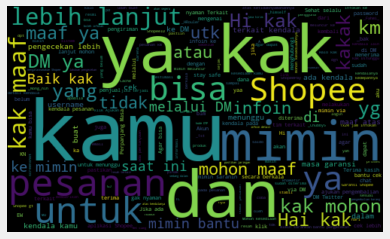

In [9]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [10]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"untuk pengecekan kendala kamu lebih lanjut, s...",0.5,0.5,Positive
1,"hai kak, mohon maaf terkait kendala tidak bis...",0.0,0.0,Neutral
2,Satu orang pemenang akan dipilih secara acak &...,0.0,0.0,Neutral
3,_06 utk pengecekan lbh lanjut bisa dm ke mimin...,0.0,0.0,Neutral
4,"_06 Halo kak, maaf ya bikin cemas. mengenai ke...",0.5,0.5,Positive
...,...,...,...,...
195,\nkalo ada yg ditanyakan kembali boleh infoka...,0.0,0.0,Neutral
196,"Hai kak, maaf yah buat kamu gak nyaman. terka...",0.0,0.0,Neutral
197,"Baik Kak, mimin bantu cek DM. Selamat siang 🙏^ST",0.0,0.0,Neutral
198,"_ baik kak, mohon kesediaannya untuk menunggu ...",0.0,0.0,Neutral


In [11]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11) _HRouler hi kak, maaf ya udah buat km resah, mengenai kendala aplikasi yg lemot saat ini tdk ada kendala pd sistem shopee ya. mimin saranin utk kamu ikutin langkah2 berikut: (1/5)

12)  Hai kak, maaf ya buat resah terkait kendala kamu gak bisa login,
krn lupa password dan belum menerima kode.

Mimin bantu infoin, silakan mengikuti langkah-langkah berikut ini ya: (1) 🙏🏻^EW

13) _himself hi kak, maaf ya udah buat km resah, mengenai kendala akun yg tiba2 terlogout saat ini tdk ada kendala pd sistem shopee ya. mimin saranin utk kamu ikutin langkah2 berikut: (1/5)



In [12]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  untuk pengecekan kendala kamu lebih lanjut, silakan infoin screenshot kendalanya ke dm  . stay safe 🙏^QK (2/2)

200) _06 Halo kak, maaf ya bikin cemas. mengenai kendala top up ShopeePay kamu yg blm masuk mohon menunggu 1x24 jam sjk kamu melakukan pembayaran ya. (1)

201)  Hi kak, maaf ya buat km gak nyaman🙏 terkait app yang lelet, mimin saranin utk update aplikasi ke versi terbaru, clear cache, pastikan jaringan stabil &amp; log out serta log in kembali (1/2)

202)  agar dapat mimin bantu kendala kamu lebih lanjut, silakan infoin detail kendala kamu ke dm  . stay safe 🙏^QK (3/3)

203)  Boleh bantu infoin mimin via DM  dengan melampirkan no. pesanan dan username kamu ya. Stay safe (2) 🙏🏻^EW

204)  agar dapat mimin bantu pengecekan lebih lanjut, silakan infoin nomor pesanan dan username Shopee ke mimin di DM  ya kak. stay safe 🙏^QK (2/2)

205) _HRouler Clear Cache dengan cara: pengguna IOS: Akun Shopee &gt; menu "Saya" &gt; "Pengaturan Akun" &gt; "Tentang

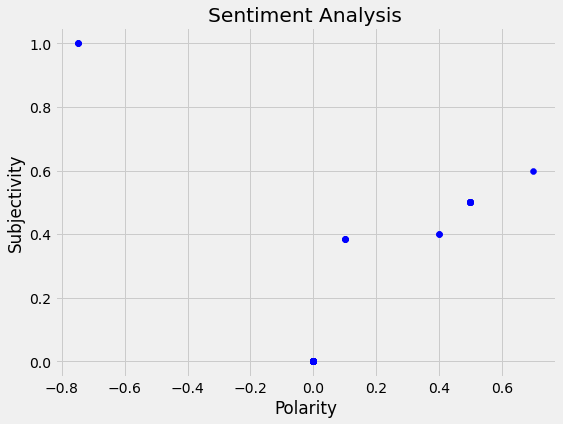

In [13]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

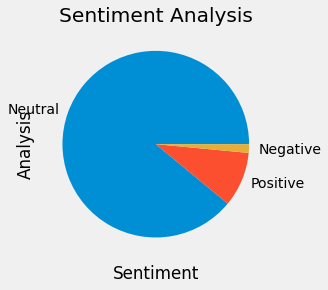

In [14]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [15]:
df['Analysis'].value_counts()

Neutral     178
Positive     19
Negative      3
Name: Analysis, dtype: int64